## 识别数据中的缺失值

### 皮马印第安人糖尿病预测数据集
**数据有9列，共768个数据点（行）。这个数据集希望通过体检结果细节，预测21岁以上的女性皮马印第安人5年内是否会患糖尿病。**
1. 怀孕次数；
2. 口服葡萄糖耐量试验中的2小时血浆葡萄糖浓度；
3. 舒张压（mmHg）；
4. 三头肌皮褶厚度（mm）；
5. 2小时血清胰岛素浓度（μU/ml）；
6. 体重指数[BMI，即体重（kg）除以身高（m）的平方]；
7. 糖尿病血系功能；
8. 年龄（岁）；
9. 类变量（0或1，代表无或有糖尿病）。

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 另一个流行的可视化工具
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [54]:
pima = pd.read_csv('./data/pima.data')

In [55]:
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### 表格没有列名，手动添加

In [56]:
pima_column_names = ['怀孕次数','血浆葡萄糖浓度','舒张压','三头肌皮褶厚度'
                     ,'血清胰岛素浓度','体重指数','糖尿病血系功能','年龄','有无糖尿病']
pima = pd.read_csv('./data/pima.data',names = pima_column_names)
pima.head()

,怀孕次数,血浆葡萄糖浓度,舒张压,三头肌皮褶厚度,血清胰岛素浓度,体重指数,糖尿病血系功能,年龄,有无糖尿病
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 用列名做一些基本的统计、选择和可视化操作

In [57]:
pima['有无糖尿病'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: 有无糖尿病, dtype: float64

#### 对糖尿病患者和健康人的区别进行可视化

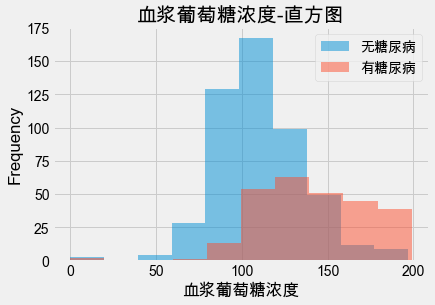

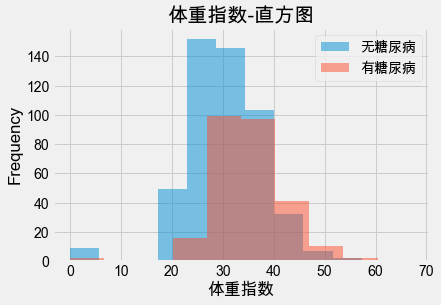

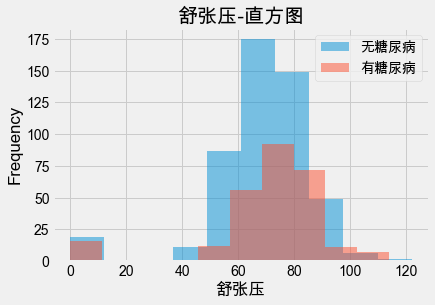

In [58]:
#  对 血浆葡萄糖浓度,体重指数,舒张压 列绘制直方图
cols = ['血浆葡萄糖浓度','体重指数','舒张压']
for col in cols:
    plt.hist(pima[pima['有无糖尿病']==0][col],10,alpha=0.5,label='无糖尿病')
    plt.hist(pima[pima['有无糖尿病']==1][col],10,alpha=0.5,label='有糖尿病')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('{}-直方图'.format(col))
    plt.show()

#### 用线性相关矩阵来量化这些变量间的关系

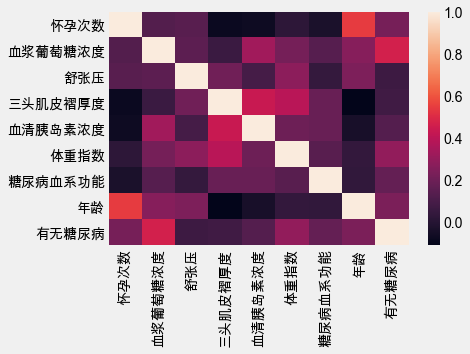

In [59]:
# 数据集相关矩阵的热力图
sns.heatmap(pima.corr())

In [60]:
# 相关矩阵
pima.corr()['有无糖尿病']

# 血浆葡萄糖浓度 和 糖尿病相关性最高

怀孕次数       0.221898
血浆葡萄糖浓度    0.466581
舒张压        0.065068
三头肌皮褶厚度    0.074752
血清胰岛素浓度    0.130548
体重指数       0.292695
糖尿病血系功能    0.173844
年龄         0.238356
有无糖尿病      1.000000
Name: 有无糖尿病, dtype: float64

#### 查看数据集中是否有缺失值

In [61]:
pima.isnull().sum()

怀孕次数       0
血浆葡萄糖浓度    0
舒张压        0
三头肌皮褶厚度    0
血清胰岛素浓度    0
体重指数       0
糖尿病血系功能    0
年龄         0
有无糖尿病      0
dtype: int64

In [62]:
pima.shape

(768, 9)

#### DataFrame内置的基本描述性统计

In [63]:
pima.describe()

# 血浆葡萄糖浓度 舒张压 三头肌皮褶厚度 血清胰岛素浓度 体重指数 min都是0
# 可见缺失值已用0填充

,怀孕次数,血浆葡萄糖浓度,舒张压,三头肌皮褶厚度,血清胰岛素浓度,体重指数,糖尿病血系功能,年龄,有无糖尿病
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 处理数据集中的缺失值

In [64]:
pima['血清胰岛素浓度'].isnull().sum()

0

In [65]:
# 用None手动替换0
pima['血清胰岛素浓度'] = pima['血清胰岛素浓度'].map(lambda x:x if x!=0 else None)
pima['血清胰岛素浓度'].isnull().sum()

374

In [66]:
# 直接对所有列操作
columns = ['血浆葡萄糖浓度','舒张压','三头肌皮褶厚度','血清胰岛素浓度','体重指数']
for col in columns:
    pima[col].replace([0],[None],inplace = True)

In [67]:
pima.isnull().sum()

怀孕次数         0
血浆葡萄糖浓度      5
舒张压         35
三头肌皮褶厚度    227
血清胰岛素浓度    374
体重指数        11
糖尿病血系功能      0
年龄           0
有无糖尿病        0
dtype: int64

In [68]:
pima.head()

,怀孕次数,血浆葡萄糖浓度,舒张压,三头肌皮褶厚度,血清胰岛素浓度,体重指数,糖尿病血系功能,年龄,有无糖尿病
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [69]:
pima.describe()

# describe 不包括有缺失值的列

,怀孕次数,血清胰岛素浓度,糖尿病血系功能,年龄,有无糖尿病
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [70]:
# 还是可以取均值 和 标准差
pima['血浆葡萄糖浓度'].mean(),pima['血浆葡萄糖浓度'].std()

(121.6867627785059, 30.53564107280403)

### 删除有害的行

In [71]:
# 删除存在缺失值的行
pima_dropped = pima.dropna()

In [72]:
# 看下删除了多少行
num_rows_lost = pima.shape[0]-pima_dropped.shape[0]
num_rows_lost,pima.shape[0]
# 删除了近一半

(376, 768)

In [73]:
# 丢弃缺失值前后的数据分析
pima['有无糖尿病'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: 有无糖尿病, dtype: float64

In [74]:
pima_dropped['有无糖尿病'].value_counts(normalize = True)

0    0.668367
1    0.331633
Name: 有无糖尿病, dtype: float64

In [75]:
pima.mean()

怀孕次数         3.845052
血浆葡萄糖浓度    121.686763
舒张压         72.405184
三头肌皮褶厚度     29.153420
血清胰岛素浓度    155.548223
体重指数        32.457464
糖尿病血系功能      0.471876
年龄          33.240885
有无糖尿病        0.348958
dtype: float64

In [76]:
pima_dropped.mean()

怀孕次数         3.301020
血浆葡萄糖浓度    122.627551
舒张压         70.663265
三头肌皮褶厚度     29.145408
血清胰岛素浓度    156.056122
体重指数        33.086224
糖尿病血系功能      0.523046
年龄          30.864796
有无糖尿病        0.331633
dtype: float64

Text(0, 0.5, '%')

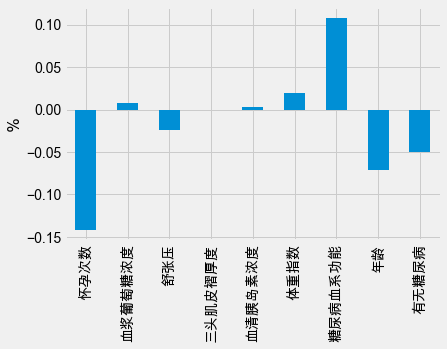

In [77]:
# 均值变化百分比条形图
ax = ((pima_dropped.mean()-pima.mean())/pima.mean()).plot(kind='bar')
ax.set_ylabel("%")

# 怀孕次数下降14%，糖尿病血系功能上升了11%

#### 用丢弃缺失值后的数据 使用KNN进行分类 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('有无糖尿病',axis=1)
y_dropped = pima_dropped['有无糖尿病']

# 网格搜索 最优的k
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,knn_params)
grid.fit(X_dropped,y_dropped)
print(grid.best_score_,grid.best_params_)

0.7348263550795197 {'n_neighbors': 7}


### 填充缺失值

#### 使用fillna方法 将所有的None填充为该列其余数据的均值

In [82]:
# inplace 它的作用是：是否在原对象基础上进行修改
pima['血浆葡萄糖浓度'].fillna(pima['血浆葡萄糖浓度'].mean(),inplace= True)
pima['血浆葡萄糖浓度'].isnull().sum()

0

#### 使用sklearn预处理模块Imputer

In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# 调用fit_transform方法创建新对象
pima_imputed = imputer.fit_transform(pima)

In [87]:
type(pima_imputed)

numpy.ndarray

In [90]:
# 将数组转换回Pandas的DataFrame对象
pima_imputed = pd.DataFrame(pima_imputed,columns=pima_column_names)
pima_imputed.head()

,怀孕次数,血浆葡萄糖浓度,舒张压,三头肌皮褶厚度,血清胰岛素浓度,体重指数,糖尿病血系功能,年龄,有无糖尿病
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [91]:
# 检查是否还有缺失值
pima_imputed.isnull().sum()

怀孕次数       0
血浆葡萄糖浓度    0
舒张压        0
三头肌皮褶厚度    0
血清胰岛素浓度    0
体重指数       0
糖尿病血系功能    0
年龄         0
有无糖尿病      0
dtype: int64

### 机器学习流水线

In [92]:
from sklearn.model_selection import train_test_split

X = pima[['血清胰岛素浓度']].copy()
y = pima['有无糖尿病'].copy()

X.isnull().sum()

血清胰岛素浓度    374
dtype: int64

In [93]:
# 在划分后填充值
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 99)
X.isnull().sum()

血清胰岛素浓度    374
dtype: int64

In [95]:
# 用训练集的均值填充训练集和测试集的缺失值
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

In [96]:
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.4895833333333333


#### 结合使用pipeline和imputer

In [101]:
from sklearn.pipeline import Pipeline

knn_params = {
    'classify__n_neighbors':[1,2,3,4,5,6,7]
    # 重新定义参数名以符合流水线
}
mean_impute = Pipeline([('imputer',SimpleImputer(strategy='median')),('classify',knn)])

X = pima.drop('有无糖尿病',axis=1)
y = pima['有无糖尿病']

grid = GridSearchCV(mean_impute,knn_params)

grid.fit(X,y)
print(grid.best_score_,grid.best_params_)

0.7292589763177999 {'classify__n_neighbors': 7}


### 标准化和归一化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f63dc50>,
      dtype=object)

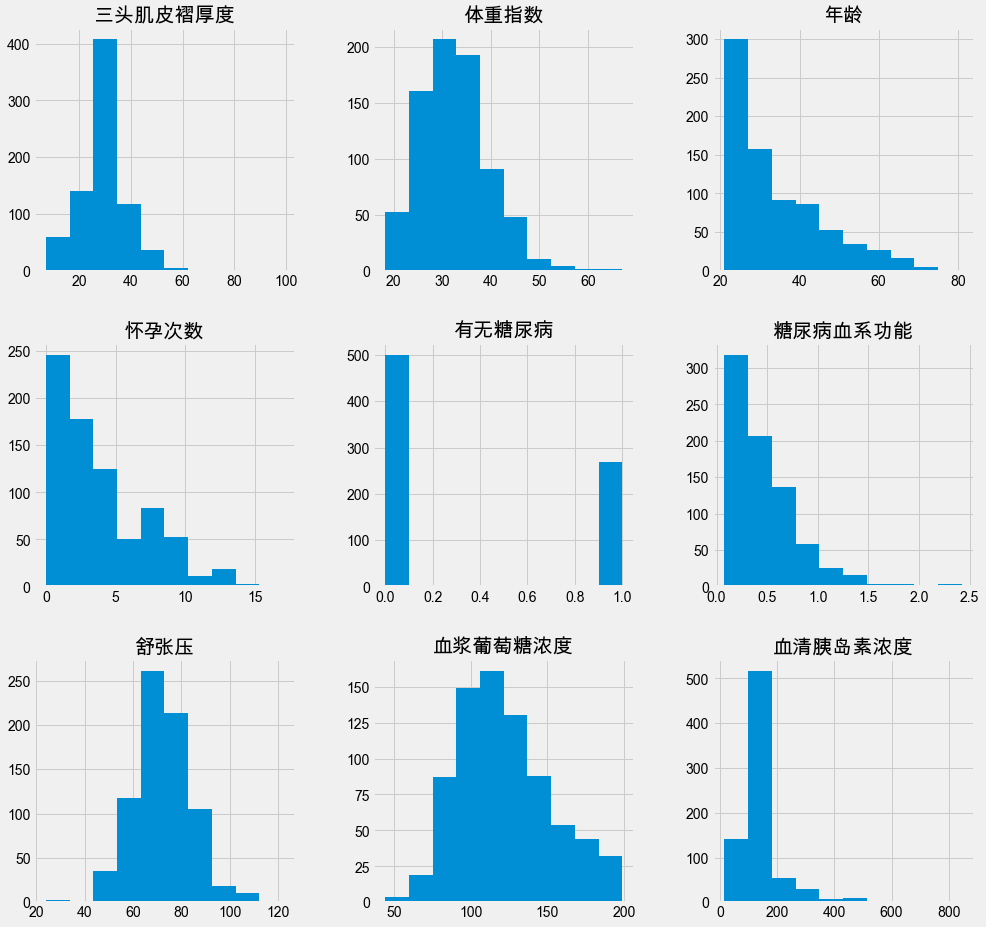

In [103]:
# 用标准直方图查看所有特征分布情况
pima_imputed.hist(figsize=(15,15))

# 每个特征的均值，最大值，最小值，标准差差别很大

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f7e710>,
      dtype=object)

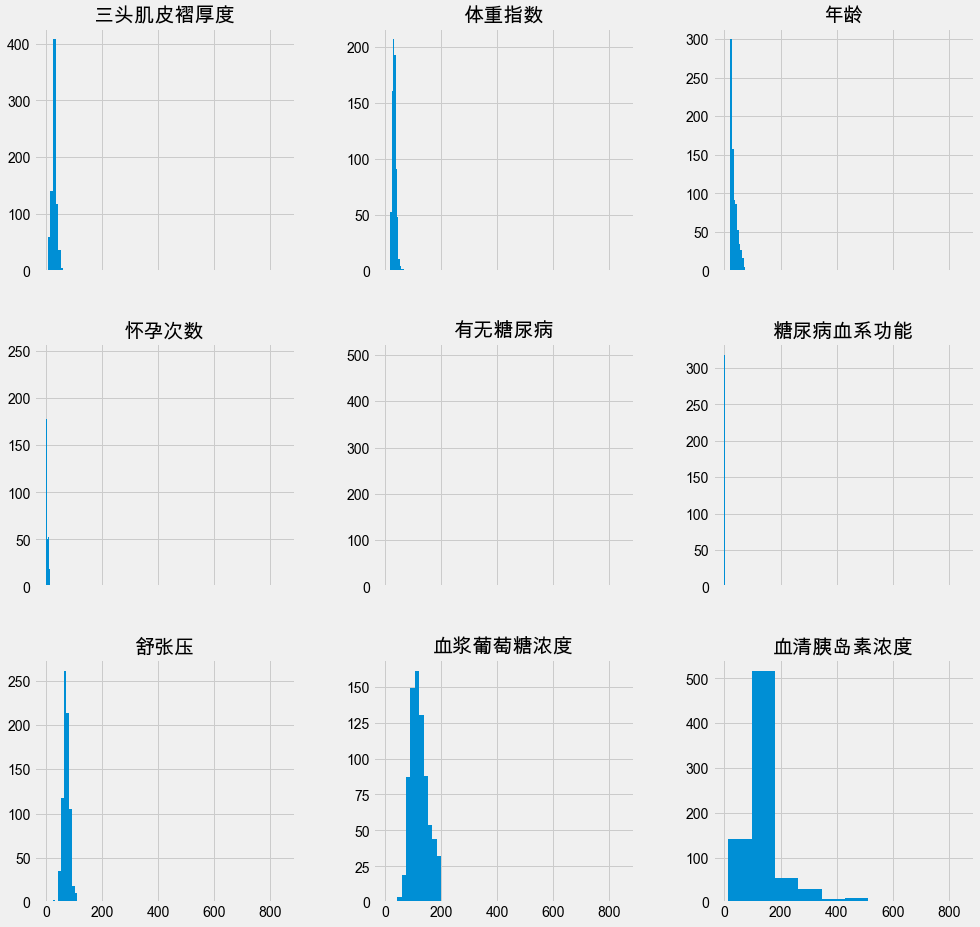

In [105]:
# 在同一比例下查看每个图表
pima_imputed.hist(figsize=(15,15),sharex=True)
# x轴相同

### z分数标准化

> z = (x-μ)/σ<br>
  z - 新的值<br>
  x - 单元格原来的值<br>
  μ - 该列的均值<br>
  σ - 该列的标准差<br>

In [107]:
pima['血浆葡萄糖浓度'].head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: 血浆葡萄糖浓度, dtype: float64

In [108]:
# 取此列均值
mu = pima['血浆葡萄糖浓度'].mean()

# 取此列标准差
sigma = pima['血浆葡萄糖浓度'].std()

# 计算z分数
((pima['血浆葡萄糖浓度']-mu)/sigma).head()

0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: 血浆葡萄糖浓度, dtype: float64

#### sklearn中的z分数归一化

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
glucose_z_score = scaler.fit_transform(pima[['血浆葡萄糖浓度']])

glucose_z_score.mean(),glucose_z_score.std()

(-3.561965537339044e-16, 1.0)

#### z分数归一化后的直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220f7350>,
      dtype=object)

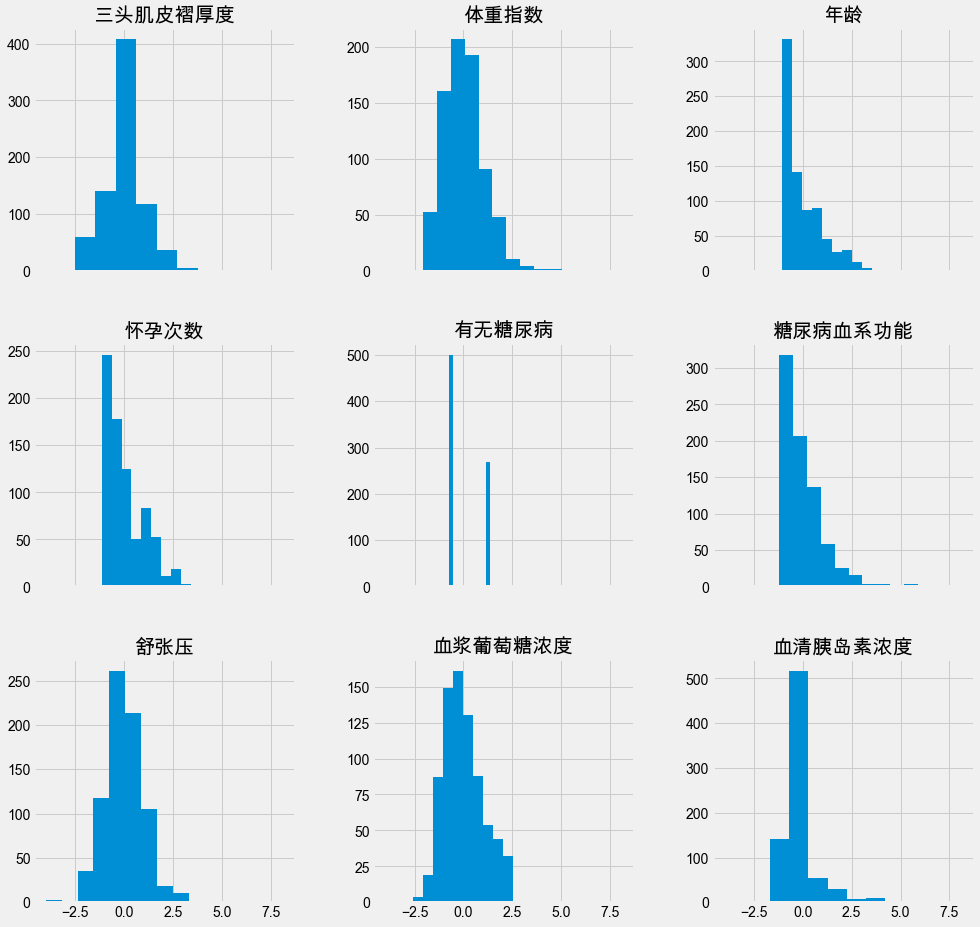

In [111]:
pima_imputed_mean_scaled = pd.DataFrame(scaler.fit_transform(pima_imputed),columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15,15),sharex=True)

#### 将StandardScaler加入流水线

In [116]:
knn_params = {
    'imputer__strategy':['mean','median'],
    'classify__n_neighbors':[1,2,3,4,5,6,7]
}
mean_impute_standardize = Pipeline([('imputer',SimpleImputer(strategy='median')),
                                    ('standardize',StandardScaler()),
                                    ('classify',knn)])

X = pima.drop('有无糖尿病',axis=1)
y = pima['有无糖尿病']

grid = GridSearchCV(mean_impute_standardize,knn_params)

grid.fit(X,y)
print(grid.best_score_,grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


### min-max标准化

> m = (x-x_min)/(x_max-x_min)<br>
  m - 新的值<br>
  x - 原来的值<br>
  x_min - 该列最小值<br>
  x_max - 该列最大值<br>

In [117]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed),columns=pima_column_names)
pima_min_maxed.describe()

,怀孕次数,血浆葡萄糖浓度,舒张压,三头肌皮褶厚度,血清胰岛素浓度,体重指数,糖尿病血系功能,年龄,有无糖尿病
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
knn_params = {
    'imputer__strategy':['mean','median'],
    'classify__n_neighbors':[1,2,3,4,5,6,7]
}
mean_impute_standardize = Pipeline([('imputer',SimpleImputer(strategy='median')),
                                    ('standardize',MinMaxScaler()),
                                    ('classify',knn)])

X = pima.drop('有无糖尿病',axis=1)
y = pima['有无糖尿病']

grid = GridSearchCV(mean_impute_standardize,knn_params)

grid.fit(X,y)
print(grid.best_score_,grid.best_params_)

0.7630336983278159 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


#### 行归一化
**每行的向量长度相同 ||x|| = (x1^2+x2^2+···+xn^2)^(1/2)   — L2范数**

In [120]:
from sklearn.preprocessing import Normalizer # 行归一化

normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed),columns=pima_column_names)

np.sqrt((pima_normalized**2).sum(axis=1)).mean()
# 行归一化后矩阵的平均范数

1.0

In [ ]:
knn_params = {
    'imputer__strategy':['mean','median'],
    'classify__n_neighbors':[1,2,3,4,5,6,7]
}
mean_impute_normalize = Pipeline([('imputer',SimpleImputer(strategy='median')),
                                    ('normalize',Normalizer()),
                                    ('classify',knn)])

X = pima.drop('有无糖尿病',axis=1)
y = pima['有无糖尿病']

grid = GridSearchCV(mean_impute_normalize,knn_params)

grid.fit(X,y)
print(grid.best_score_,grid.best_params_)